# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Evan Fatur</p>
### <p style="text-align: right;"> &#9989; efatur2004</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [12]:
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Ural', 'Afghanistan'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Southern Europe', 'Western Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Egypt', 'North Africa', 'Middle East']
    },
    'Africa': {
        'North Africa': ['Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo', 'Brazil'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Middle East', 'Madagascar'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Afghanistan', 'China', 'Siberia'],
        'Siberia': ['Ural', 'China', 'Mongolia', 'Irkutsk', 'Yakutsk'],
        'Yakutsk': ['Siberia', 'Irkutsk', 'Kamchatka'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Mongolia': ['Irkutsk', 'Kamchatka', 'Japan', 'China', 'Siberia'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'Middle East', 'India'],
        'China': ['Afghanistan', 'Ural', 'Siberia', 'Mongolia', 'Siam', 'India'],
        'Middle East': ['Southern Europe', 'Egypt', 'East Africa', 'Afghanistan', 'India'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}

### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [16]:
import networkx as nx

def create_risk_graph(territories):
    #create empty graph
    G = nx.Graph()
    
    # Go through each continent and its territories
    for continent, continent_territories in territories.items():
        for territory, neighbors in continent_territories.items():
            # Add the territory with a 'continent' attribute
            G.add_node(territory, continent=continent)
            # Connect the territory to its neighbors
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    
    return G

G = create_risk_graph(risk_territories)

print("Nodes with attributes:")
print(G.nodes(data=True))

print("\nEdges:")
print(G.edges())

Nodes with attributes:
[('Alaska', {'continent': 'North America'}), ('Northwest Territory', {'continent': 'North America'}), ('Alberta', {'continent': 'North America'}), ('Kamchatka', {'continent': 'Asia'}), ('Greenland', {'continent': 'North America'}), ('Ontario', {'continent': 'North America'}), ('Quebec', {'continent': 'North America'}), ('Iceland', {'continent': 'Europe'}), ('Western United States', {'continent': 'North America'}), ('Eastern United States', {'continent': 'North America'}), ('Central America', {'continent': 'North America'}), ('Venezuela', {'continent': 'South America'}), ('Brazil', {'continent': 'South America'}), ('Peru', {'continent': 'South America'}), ('Argentina', {'continent': 'South America'}), ('North Africa', {'continent': 'Africa'}), ('Great Britain', {'continent': 'Europe'}), ('Scandinavia', {'continent': 'Europe'}), ('Northern Europe', {'continent': 'Europe'}), ('Ukraine', {'continent': 'Europe'}), ('Southern Europe', {'continent': 'Europe'}), ('Ural',

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

Choose a layout for the graph visualization:
1: spring_layout
2: circular_layout
3: kamada_kawai_layout
4: spectral_layout
5: shell_layout


Enter the number of your choice:  3


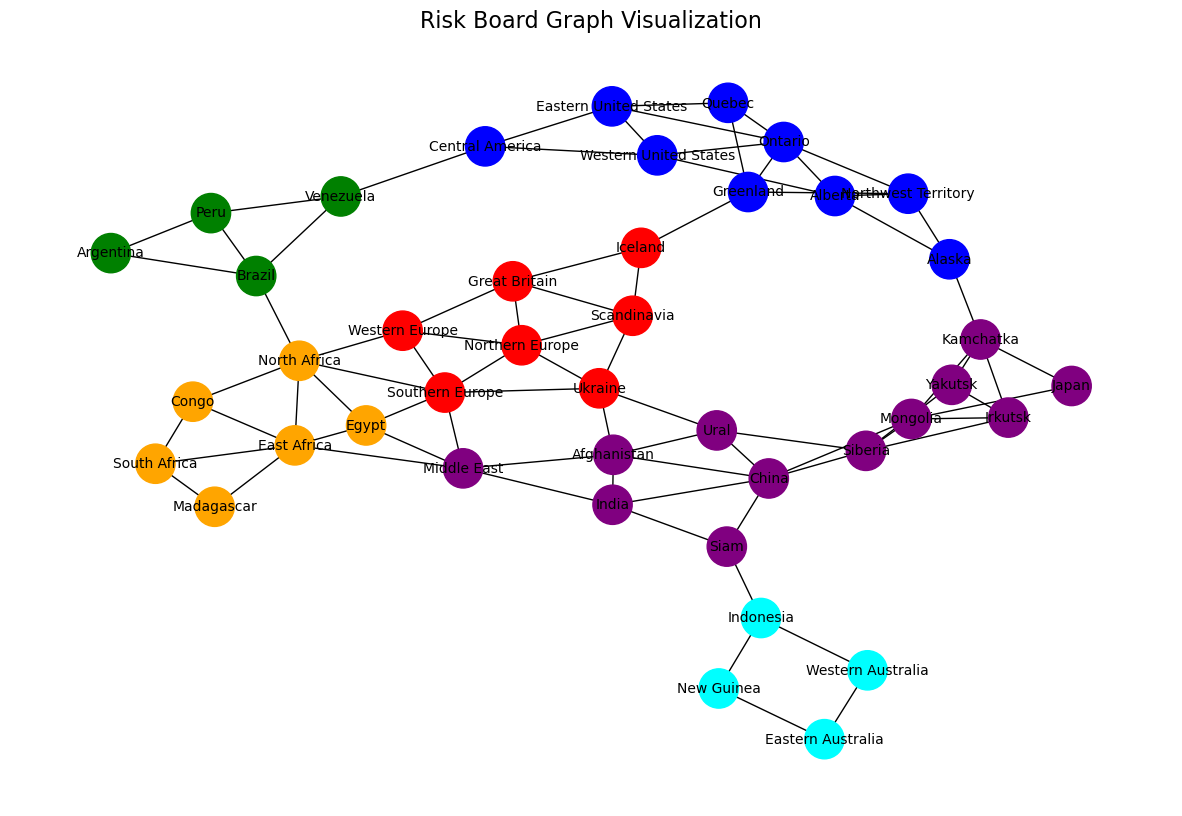

In [36]:
import networkx as nx

def visualize_risk_graph(G):
    # Define layout options
    layout_options = {
        "spring_layout": nx.spring_layout, 
        "circular_layout": nx.circular_layout,
        "kamada_kawai_layout": nx.kamada_kawai_layout,
        "spectral_layout": nx.spectral_layout,
        "shell_layout": nx.shell_layout
    }

    # Ask user to choose a layout
    print("Choose a layout for the graph visualization:")
    for i, layout in enumerate(layout_options.keys(), start=1):
        print(f"{i}: {layout}")
    layout_choice = int(input("Enter the number of your choice: ")) - 1
    chosen_layout = list(layout_options.values())[layout_choice]

    # Compute node positions using the chosen layout
    pos = chosen_layout(G)

    # Map continents to colors
    continent_colors = {
        'North America': 'blue',
        'South America': 'green',
        'Europe': 'red',
        'Africa': 'orange',
        'Asia': 'purple',
        'Australia': 'cyan'
    }

    # Assign colors to nodes based on their continent
    node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes]

    # Create the figure
    plt.figure(figsize=(15, 10))

    # Draw the nodes
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,  # Assign colors
        node_size=800  # Increase node size
    )

    # Draw the edges
    nx.draw_networkx_edges(G, pos)

    # Draw the labels
    nx.draw_networkx_labels(
        G, pos,
        font_size=10  # Increase font size
    )

    # Create a legend
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
        for color in continent_colors.values()]
    # Add a title
    plt.title("Risk Board Graph Visualization", fontsize=16)

    # Show the plot
    plt.axis('off')
    plt.show()
visualize_risk_graph(G)


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

âœŽ 1. The layout with the best visualization is the spring layout. This is because it bunches the close nodes together and pushes the farther nodes away in the model to help clarify their positioning. 
<br>2. The Kamada-Kawai layout models the edges as springs and inserts them between all pairs. Next, it lowers the spring energy of the model by changing the locations of the nodes. (zabolcs (https://stats.stackexchange.com/users/4764/szabolcs), Kamada Kawai vs Fruchterman Reingold, URL (version: 2023-02-05): https://stats.stackexchange.com/q/604369)
<br>3. The part of the code that assigns the color of each node based on its continent is the continent colors chunk: 
continent_colors = {
    'North America': 'blue',
    'South America': 'green',
    'Europe': 'red',
    'Africa': 'orange',
    'Asia': 'purple',
    'Australia': 'cyan'
}

node_colors = [continent_colors[G.nodes[node]['continent']] for node in <br>4. The legend was created in this chunk of code: 
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    for color in continent_colors.values()]This first line (plt.Line2D) creates an object that is used as the legend marker. Next, this line simply sets all colors to white then changes the nodes' colors based on their corresponding color for their continent.
<br>5. I did not end up using a colormap as I just assigned each continent to a color. There was way of importing a colormap because I didn't import one. 
continent_colors = {
    'North America': 'blue',
    'South America': 'green',
    'Europe': 'red',
    'Africa': 'orange',
    'Asia': 'purple',
    'Australia': 'cyan'
}
<br>6. I set the node size through the networkx command. I included the nodesize in this chunk of code: nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,  # Assign colors
        node_size=800  # Increase node size
    )
<br>7. The labels for the nodes were printed through the networkx.labels function in this chunk of code: 
nx.draw_networkx_labels(
    G, pos,
    font_size=10  
)


G.nodes]


---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University